#### King Shaka International Airport Weather Prediction

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [141]:
weather = pd.read_csv('king_shaka_weather.csv', index_col='DATE')

In [142]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2010-04-30,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,65,NaN,NaN
2010-05-01,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,71,NaN,NaN
2010-05-02,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,72,NaN,NaN
2010-05-03,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,72,NaN,NaN
2010-05-04,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,71,NaN,NaN
...,...,...,...,...,...,...
2022-11-06,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,71,NaN,NaN
2022-11-07,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,72,NaN,NaN
2022-11-08,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,71,NaN,NaN


In [143]:
# Look for missing values by percentage
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.594358
TAVG       0.000000
TMAX       0.230265
TMIN       0.678548
dtype: float64

In [144]:
# Look for duplicates
weather.duplicated().sum()

2145

In [145]:
weather['STATION'].unique(), weather['NAME'].unique()

(array(['SFM00068592'], dtype=object),
 array(['KING SHAKA INTERNATIONAL AIRPORT, SF'], dtype=object))

In [146]:
weather.head()

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2010-04-30,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,65,NaN,NaN
2010-05-01,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,71,NaN,NaN
2010-05-02,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,72,NaN,NaN
2010-05-03,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,72,NaN,NaN
2010-05-04,SFM00068592,"KING SHAKA INTERNATIONAL AIRPORT, SF",NaN,71,NaN,NaN


In [147]:
core_weather = weather[['PRCP', 'TAVG', 'TMAX', 'TMIN']].copy()
core_weather.columns = ['precipitation', 'avg_temp', 'max_temp', 'min_temp']

In [148]:
core_weather

,precipitation,avg_temp,max_temp,min_temp
DATE,,,,
2010-04-30,NaN,65,NaN,NaN
2010-05-01,NaN,71,NaN,NaN
2010-05-02,NaN,72,NaN,NaN
2010-05-03,NaN,72,NaN,NaN
2010-05-04,NaN,71,NaN,NaN
...,...,...,...,...
2022-11-06,NaN,71,NaN,NaN
2022-11-07,NaN,72,NaN,NaN
2022-11-08,NaN,71,NaN,NaN


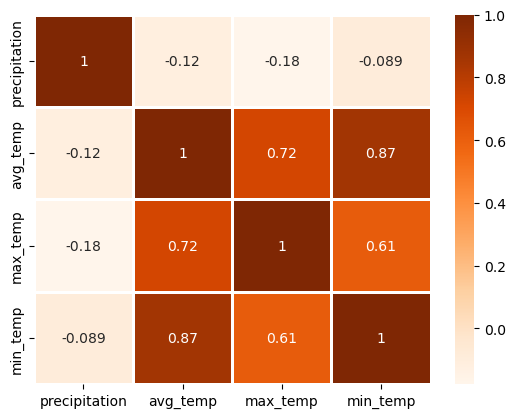

In [152]:
# correlation
sns.heatmap(core_weather.corr(), annot =True, cmap='Oranges',linewidth=1.0);

In [10]:
# Look for missing values
core_weather.apply(pd.isnull).sum()

precipitation    2718
avg_temp            0
max_temp         1053
min_temp         3103
dtype: int64

In [11]:
core_weather['precipitation'].value_counts() / core_weather.shape[0]

0.00    0.132954
0.01    0.044391
0.02    0.033457
0.04    0.030833
0.08    0.020993
          ...   
2.36    0.000219
1.67    0.000219
0.23    0.000219
1.77    0.000219
2.83    0.000219
Name: precipitation, Length: 105, dtype: float64

In [12]:
core_weather['precipitation'].value_counts() 

0.00    608
0.01    203
0.02    153
0.04    141
0.08     96
       ... 
2.36      1
1.67      1
0.23      1
1.77      1
2.83      1
Name: precipitation, Length: 105, dtype: int64

In [13]:
core_weather['precipitation'].mean(), core_weather['precipitation'].mode()

(0.17040970350404333,
 0    0.0
 Name: precipitation, dtype: float64)

In [22]:
core_weather.loc['2022-11-06',:]

precipitation     0.17
avg_temp         71.00
max_temp           NaN
min_temp           NaN
Name: 2022-11-06, dtype: float64

In [17]:
# KZN is prone to rainfall, so we fill with the mean
core_weather['precipitation'] = core_weather['precipitation'].fillna(0.170)

In [19]:
core_weather.apply(pd.isnull).sum()

precipitation       0
avg_temp            0
max_temp         1053
min_temp         3103
dtype: int64

In [25]:
core_weather[pd.isnull(core_weather['min_temp'])]

,precipitation,avg_temp,max_temp,min_temp
DATE,,,,
2010-04-30,0.17,65,NaN,NaN
2010-05-01,0.17,71,NaN,NaN
2010-05-02,0.17,72,NaN,NaN
2010-05-03,0.17,72,NaN,NaN
2010-05-04,0.17,71,NaN,NaN
...,...,...,...,...
2022-11-06,0.17,71,NaN,NaN
2022-11-07,0.17,72,NaN,NaN
2022-11-08,0.17,71,NaN,NaN


In [26]:
core_weather['min_temp'].unique()

array([nan, 55., 53., 51., 60., 54., 52., 49., 59., 58., 50., 40., 61.,
       66., 67., 63., 62., 64., 57., 65., 56., 69., 70., 71., 68., 72.,
       73., 48., 45., 46., 47., 74., 32., 36., 43., 44.])

In [27]:
core_weather.loc['2010-05-02':'2022-11-01']

,precipitation,avg_temp,max_temp,min_temp
DATE,,,,
2010-05-02,0.17,72,NaN,NaN
2010-05-03,0.17,72,NaN,NaN
2010-05-04,0.17,71,NaN,NaN
2010-05-05,0.17,72,NaN,NaN
2010-05-06,0.17,72,NaN,NaN
...,...,...,...,...
2022-10-28,0.17,68,NaN,NaN
2022-10-29,0.17,70,NaN,NaN
2022-10-30,0.17,73,NaN,NaN


In [30]:
# Back and forward fill
core_weather = core_weather.bfill().ffill()

In [31]:
core_weather

,precipitation,avg_temp,max_temp,min_temp
DATE,,,,
2010-04-30,0.17,65,74.0,55.0
2010-05-01,0.17,71,74.0,55.0
2010-05-02,0.17,72,74.0,55.0
2010-05-03,0.17,72,74.0,55.0
2010-05-04,0.17,71,74.0,55.0
...,...,...,...,...
2022-11-06,0.17,71,83.0,50.0
2022-11-07,0.17,72,83.0,50.0
2022-11-08,0.17,71,83.0,50.0


In [33]:
core_weather['max_temp'].unique()

array([ 74.,  75.,  76.,  84.,  88.,  71.,  78.,  67.,  70.,  72.,  73.,
        83.,  79.,  85.,  77.,  80.,  69.,  82.,  68.,  87., 107.,  81.,
        90.,  86.,  93.,  92.,  89.,  96.,  62.,  63.,  66.,  65.,  97.,
        91.,  95.,  64.,  98., 100.,  99.,  61.,  94., 103.])

In [34]:
core_weather.apply(pd.isnull).sum()

precipitation    0
avg_temp         0
max_temp         0
min_temp         0
dtype: int64

In [35]:
core_weather

,precipitation,avg_temp,max_temp,min_temp
DATE,,,,
2010-04-30,0.17,65,74.0,55.0
2010-05-01,0.17,71,74.0,55.0
2010-05-02,0.17,72,74.0,55.0
2010-05-03,0.17,72,74.0,55.0
2010-05-04,0.17,71,74.0,55.0
...,...,...,...,...
2022-11-06,0.17,71,83.0,50.0
2022-11-07,0.17,72,83.0,50.0
2022-11-08,0.17,71,83.0,50.0


In [36]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precipitation    0
avg_temp         0
max_temp         0
min_temp         0
dtype: int64

In [37]:
core_weather.dtypes

precipitation    float64
avg_temp           int64
max_temp         float64
min_temp         float64
dtype: object

In [38]:
core_weather.index

Index(['2010-04-30', '2010-05-01', '2010-05-02', '2010-05-03', '2010-05-04',
       '2010-05-05', '2010-05-06', '2010-05-07', '2010-05-08', '2010-05-09',
       ...
       '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05',
       '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10'],
      dtype='object', name='DATE', length=4573)

In [39]:
core_weather.index = pd.to_datetime(core_weather.index)

In [40]:
core_weather.index

DatetimeIndex(['2010-04-30', '2010-05-01', '2010-05-02', '2010-05-03',
               '2010-05-04', '2010-05-05', '2010-05-06', '2010-05-07',
               '2010-05-08', '2010-05-09',
               ...
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10'],
              dtype='datetime64[ns]', name='DATE', length=4573, freq=None)

In [41]:
core_weather.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=4573)

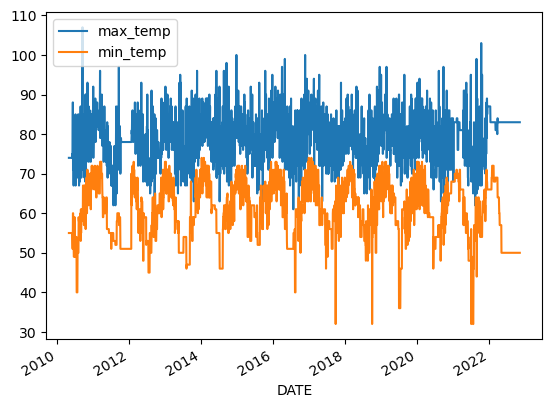

In [42]:
core_weather[['max_temp', 'min_temp']].plot();

In [43]:
core_weather.index.year.value_counts().sort_index()

2010    245
2011    365
2012    366
2013    365
2014    365
2015    364
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022    314
Name: DATE, dtype: int64

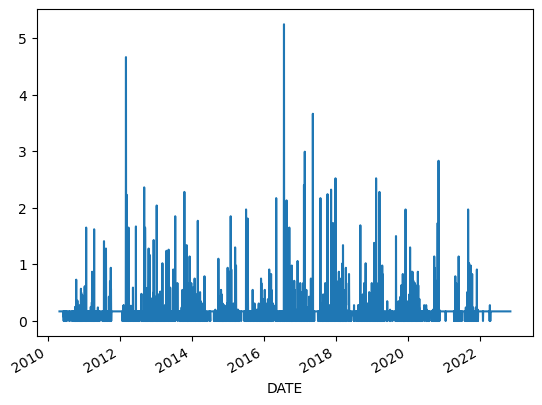

In [44]:
core_weather['precipitation'].plot();

In [47]:
core_weather.loc['2017-10-10':'2017-10-11']

,precipitation,avg_temp,max_temp,min_temp
DATE,,,,
2017-10-10,0.67,61,78.0,56.0
2017-10-11,2.24,60,73.0,56.0


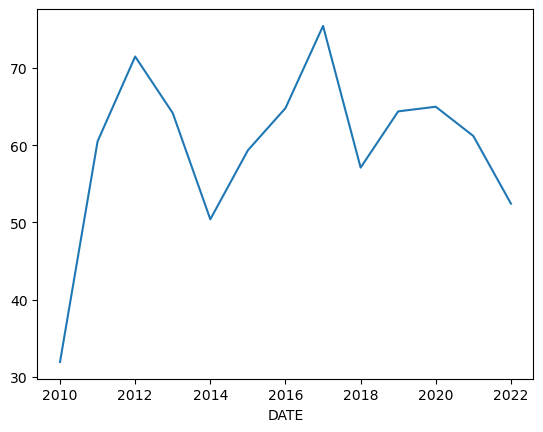

In [48]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x['precipitation'].sum()).plot();

In [46]:
core_weather['precipitation'].max()

5.24

The South African Weather Service reported torrential rain in the Durban area on the 11th of October 2017. Approximately 4.25 inches (108 mm) fell between October 10 and 11, a record high from the October, 1985 of ~4.13 Inch(105 mm)

In [49]:
core_weather['target'] = core_weather.shift(-1)['max_temp']

In [50]:
core_weather

,precipitation,avg_temp,max_temp,min_temp,target
DATE,,,,,
2010-04-30,0.17,65,74.0,55.0,74.0
2010-05-01,0.17,71,74.0,55.0,74.0
2010-05-02,0.17,72,74.0,55.0,74.0
2010-05-03,0.17,72,74.0,55.0,74.0
2010-05-04,0.17,71,74.0,55.0,74.0
...,...,...,...,...,...
2022-11-06,0.17,71,83.0,50.0,83.0
2022-11-07,0.17,72,83.0,50.0,83.0
2022-11-08,0.17,71,83.0,50.0,83.0


In [51]:
core_weather = core_weather.iloc[:-1,:].copy()

In [52]:
core_weather

,precipitation,avg_temp,max_temp,min_temp,target
DATE,,,,,
2010-04-30,0.17,65,74.0,55.0,74.0
2010-05-01,0.17,71,74.0,55.0,74.0
2010-05-02,0.17,72,74.0,55.0,74.0
2010-05-03,0.17,72,74.0,55.0,74.0
2010-05-04,0.17,71,74.0,55.0,74.0
...,...,...,...,...,...
2022-11-05,0.17,72,83.0,50.0,83.0
2022-11-06,0.17,71,83.0,50.0,83.0
2022-11-07,0.17,72,83.0,50.0,83.0


In [53]:
from sklearn.linear_model import Ridge

In [105]:
reg = Ridge(alpha=.1)

In [106]:
predictors = ['precipitation', 'max_temp', 'avg_temp', 'min_temp']

In [109]:
train = core_weather.loc[:"2012-12-31"]
test = core_weather.loc["2021-01-01":]

In [110]:
train

,precipitation,avg_temp,max_temp,min_temp,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
2010-06-29,0.00,67,83.0,58.0,83.0,76.433333,0.920884,1.431034,83.000000,83.000000
2010-06-30,0.17,64,83.0,49.0,73.0,76.733333,0.924498,1.693878,83.000000,83.000000
2010-07-01,0.02,62,73.0,49.0,73.0,76.700000,1.050685,1.489796,73.000000,73.000000
2010-07-02,0.00,62,73.0,49.0,73.0,76.666667,1.050228,1.489796,73.000000,73.000000
2010-07-03,0.17,60,73.0,49.0,72.0,76.600000,1.049315,1.489796,73.000000,73.000000
...,...,...,...,...,...,...,...,...,...,...
2012-12-27,0.00,76,83.0,69.0,86.0,80.700000,0.972289,1.202899,80.000000,82.333333
2012-12-28,0.17,77,86.0,69.0,87.0,81.066667,0.942636,1.246377,80.067416,83.333333
2012-12-29,0.17,78,87.0,73.0,87.0,81.366667,0.935249,1.191781,80.144444,81.333333


In [111]:
test

,precipitation,avg_temp,max_temp,min_temp,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
2021-01-01,0.17,68,84.0,68.0,68.0,78.8,0.938095,1.235294,83.019293,83.818182
2021-01-02,0.17,65,68.0,68.0,68.0,78.7,1.157353,1.000000,82.971154,83.545455
2021-01-03,0.17,71,68.0,68.0,68.0,78.6,1.155882,1.000000,82.923323,81.454545
2021-01-04,0.17,75,68.0,68.0,68.0,78.5,1.154412,1.000000,82.875796,81.545455
2021-01-05,0.17,77,68.0,68.0,68.0,78.4,1.152941,1.000000,82.828571,81.000000
...,...,...,...,...,...,...,...,...,...,...
2022-11-05,0.17,72,83.0,50.0,83.0,83.0,1.000000,1.660000,78.624658,81.769231
2022-11-06,0.17,71,83.0,50.0,83.0,83.0,1.000000,1.660000,78.636612,79.000000
2022-11-07,0.17,72,83.0,50.0,83.0,83.0,1.000000,1.660000,78.648501,77.307692


In [112]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [113]:
predictions = reg.predict(test[predictors])

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
mean_squared_error(test['target'], predictions)

18.65739664430247

In [116]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'predictions']

In [117]:
combined

,actual,predictions
DATE,,
2021-01-01,68.0,80.977714
2021-01-02,68.0,73.497677
2021-01-03,68.0,75.516807
2021-01-04,68.0,76.862893
2021-01-05,68.0,77.535936
...,...,...
2022-11-05,83.0,81.076466
2022-11-06,83.0,80.739945
2022-11-07,83.0,81.076466


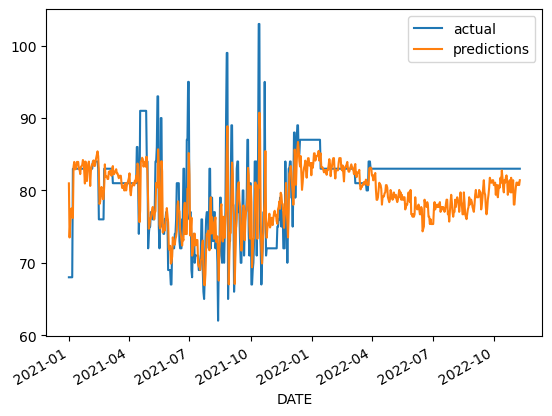

In [118]:
combined.plot();

In [123]:
reg.coef_

array([-1.28563648,  0.40440446,  0.33652159,  0.0468294 ])

In [124]:
core_weather['month_max'] = core_weather['max_temp'].rolling(30).mean()

core_weather['month_day_max'] = core_weather['month_max'] / core_weather['max_temp']

core_weather['max_min'] = core_weather['max_temp'] / core_weather['min_temp']

In [125]:
core_weather = core_weather.iloc[30:,:].copy()

In [126]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2012-12-31"]
    test = core_weather.loc["2021-01-01":]
    
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test['target'], predictions)
    
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    return error, combined

In [127]:
predictors = ['precipitation', 'avg_temp', 'max_temp', 'min_temp', 'month_max', 'month_day_max', 'max_min']

error, combined = create_predictions(predictors, core_weather, reg)
error

18.15500100970387

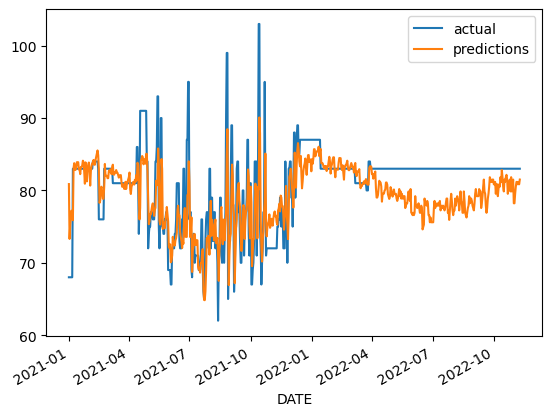

In [128]:
combined.plot();

In [129]:
core_weather['monthly_avg'] = core_weather['max_temp'].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather['day_of_year_avg'] = core_weather['max_temp'].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [130]:
error, combined = create_predictions(predictors + ['monthly_avg', 'day_of_year_avg'], core_weather, reg)
error

15.82293116263731

In [131]:
reg.coef_

array([-1.12467467,  0.36322028,  0.59221053, -0.12945221,  0.15862338,
       -0.99603529, -7.51238357, -0.07769769, -0.12056829])

In [132]:
core_weather.corr()['target']

precipitation     -0.095715
avg_temp           0.624095
max_temp           0.651419
min_temp           0.381272
target             1.000000
month_max          0.491624
month_day_max     -0.450106
max_min            0.029388
monthly_avg        0.454452
day_of_year_avg    0.509836
Name: target, dtype: float64

In [133]:
combined['diff'] = (combined['actual'] - combined['predictions']).abs()

In [134]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2021-10-13,103.0,80.676479,22.323521
2021-10-22,95.0,78.543550,16.456450
2021-10-15,75.0,90.030866,15.030866
2021-08-28,65.0,79.757430,14.757430
2021-06-29,95.0,80.273279,14.726721
2021-06-27,87.0,73.157600,13.842400
2021-04-18,91.0,77.419673,13.580327
2021-05-19,90.0,76.732244,13.267756
2021-08-25,90.0,76.892363,13.107637


In [135]:
core_weather.loc['2022-11-01':'2022-11-11']

,precipitation,avg_temp,max_temp,min_temp,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
2022-11-01,0.17,63,83.0,50.0,83.0,83.0,1.0,1.66,78.576177,74.692308
2022-11-02,0.17,67,83.0,50.0,83.0,83.0,1.0,1.66,78.588398,76.615385
2022-11-03,0.17,70,83.0,50.0,83.0,83.0,1.0,1.66,78.600551,78.307692
2022-11-04,0.17,72,83.0,50.0,83.0,83.0,1.0,1.66,78.612637,78.538462
2022-11-05,0.17,72,83.0,50.0,83.0,83.0,1.0,1.66,78.624658,81.769231
2022-11-06,0.17,71,83.0,50.0,83.0,83.0,1.0,1.66,78.636612,79.000000
2022-11-07,0.17,72,83.0,50.0,83.0,83.0,1.0,1.66,78.648501,77.307692
2022-11-08,0.17,71,83.0,50.0,83.0,83.0,1.0,1.66,78.660326,77.769231
2022-11-09,0.17,73,83.0,50.0,83.0,83.0,1.0,1.66,78.672087,78.307692
